In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

Link for dataset and background info
https://crime-data-explorer.fr.cloud.gov/pages/downloads#datasets

Years: 1991-2020
Last modified: October 25, 2021

There are 219577 rows and 21 columns

This notebook focuses on Unsupervied Learning. We are exploring if there are any patterns among states and territories when analyzing various incidents by hate crime bias.

No data cleaning is necessary since that was done during preprocessing. A csv with the cleaned hate crime and political dataframe was combined and was named crime_politics.csv. This is the data that has been loaded to this notebook. 

In [2]:
combined_df = pd.read_csv('crime_politics.csv')
combined_df

,Unnamed: 0,DATA_YEAR,STATE_ABBR,REGION_NAME,POPULATION_GROUP_CODE,INCIDENT_DATE,TOTAL_OFFENDER_COUNT,OFFENDER_RACE,VICTIM_COUNT,OFFENSE_NAME,...,BIAS_DESC,VICTIM_TYPES,CONGRESS,YEAR_START,YEAR_END,HOUSE_MAJORITY,SENATE_MAJORITY,PRESIDENCY,PRESIDENT,PARTY_GOVERNMENT
0,0,1991,AR,South,5,1991-08-31,1,White,1,Intimidation,...,Anti-Black or African American,Individual,102,1991,1993,Democrats,Democrats,Republican,G.H.W Bush,Divided
1,1,1991,AR,South,6,1991-09-19,1,Black or African American,1,Simple Assault,...,Anti-White,Individual,102,1991,1993,Democrats,Democrats,Republican,G.H.W Bush,Divided
2,2,1991,AR,South,3,1991-07-04,1,Black or African American,1,Aggravated Assault,...,Anti-Black or African American,Individual,102,1991,1993,Democrats,Democrats,Republican,G.H.W Bush,Divided
3,3,1991,AR,South,3,1991-12-24,1,Black or African American,2,Aggravated Assault;Destruction/Damage/Vandalis...,...,Anti-White,Individual,102,1991,1993,Democrats,Democrats,Republican,G.H.W Bush,Divided
4,4,1991,AR,South,3,1991-12-23,1,Black or African American,1,Aggravated Assault,...,Anti-White,Individual,102,1991,1993,Democrats,Democrats,Republican,G.H.W Bush,Divided
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219572,111023,2020,WY,West,5,2020-11-29,6,White,2,Intimidation,...,Anti-Lesbian (Female),Individual,116,2019,2021,Democrats,Republicans,Republican,Trump,Divided
219573,111024,2020,WY,West,5,2020-07-14,0,Unknown,1,Destruction/Damage/Vandalism of Property,...,Anti-White,Government,116,2019,2021,Democrats,Republicans,Republican,Trump,Divided
219574,111025,2020,WY,West,5,2020-10-16,1,Black or African American,1,Aggravated Assault,...,Anti-White,Individual,116,2019,2021,Democrats,Republicans,Republican,Trump,Divided
219575,111026,2020,WY,West,5,2020-01-30,1,White,1,Simple Assault,...,Anti-Female,Individual,116,2019,2021,Democrats,Republicans,Republican,Trump,Divided


In [3]:
combined_df.columns

Index(['Unnamed: 0', 'DATA_YEAR', 'STATE_ABBR', 'REGION_NAME',
       'POPULATION_GROUP_CODE', 'INCIDENT_DATE', 'TOTAL_OFFENDER_COUNT',
       'OFFENDER_RACE', 'VICTIM_COUNT', 'OFFENSE_NAME', 'LOCATION_NAME',
       'BIAS_DESC', 'VICTIM_TYPES', 'CONGRESS', 'YEAR_START', 'YEAR_END',
       'HOUSE_MAJORITY', 'SENATE_MAJORITY', 'PRESIDENCY', 'PRESIDENT',
       'PARTY_GOVERNMENT'],
      dtype='object')

In [4]:
#drop column at index 0. It does not provide any useful information.
combined_df.drop('Unnamed: 0', axis=1, inplace=True)
combined_df

,DATA_YEAR,STATE_ABBR,REGION_NAME,POPULATION_GROUP_CODE,INCIDENT_DATE,TOTAL_OFFENDER_COUNT,OFFENDER_RACE,VICTIM_COUNT,OFFENSE_NAME,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,CONGRESS,YEAR_START,YEAR_END,HOUSE_MAJORITY,SENATE_MAJORITY,PRESIDENCY,PRESIDENT,PARTY_GOVERNMENT
0,1991,AR,South,5,1991-08-31,1,White,1,Intimidation,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,102,1991,1993,Democrats,Democrats,Republican,G.H.W Bush,Divided
1,1991,AR,South,6,1991-09-19,1,Black or African American,1,Simple Assault,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,102,1991,1993,Democrats,Democrats,Republican,G.H.W Bush,Divided
2,1991,AR,South,3,1991-07-04,1,Black or African American,1,Aggravated Assault,Residence/Home,Anti-Black or African American,Individual,102,1991,1993,Democrats,Democrats,Republican,G.H.W Bush,Divided
3,1991,AR,South,3,1991-12-24,1,Black or African American,2,Aggravated Assault;Destruction/Damage/Vandalis...,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,102,1991,1993,Democrats,Democrats,Republican,G.H.W Bush,Divided
4,1991,AR,South,3,1991-12-23,1,Black or African American,1,Aggravated Assault,Service/Gas Station,Anti-White,Individual,102,1991,1993,Democrats,Democrats,Republican,G.H.W Bush,Divided
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219572,2020,WY,West,5,2020-11-29,6,White,2,Intimidation,Park/Playground,Anti-Lesbian (Female),Individual,116,2019,2021,Democrats,Republicans,Republican,Trump,Divided
219573,2020,WY,West,5,2020-07-14,0,Unknown,1,Destruction/Damage/Vandalism of Property,Park/Playground,Anti-White,Government,116,2019,2021,Democrats,Republicans,Republican,Trump,Divided
219574,2020,WY,West,5,2020-10-16,1,Black or African American,1,Aggravated Assault,Residence/Home,Anti-White,Individual,116,2019,2021,Democrats,Republicans,Republican,Trump,Divided
219575,2020,WY,West,5,2020-01-30,1,White,1,Simple Assault,Residence/Home,Anti-Female,Individual,116,2019,2021,Democrats,Republicans,Republican,Trump,Divided


In [5]:
combined_df.describe()

,DATA_YEAR,TOTAL_OFFENDER_COUNT,VICTIM_COUNT,CONGRESS,YEAR_START,YEAR_END
count,219577.000000,219577.000000,219577.000000,219577.000000,219577.000000,219577.000000
mean,2005.472691,0.955724,1.247567,108.983523,2004.967046,2006.967046
std,8.591466,1.358364,2.274116,4.284975,8.569949,8.569949
min,1991.000000,0.000000,1.000000,102.000000,1991.000000,1993.000000
25%,1998.000000,0.000000,1.000000,105.000000,1997.000000,1999.000000
50%,2005.000000,1.000000,1.000000,109.000000,2005.000000,2007.000000
75%,2013.000000,1.000000,1.000000,113.000000,2013.000000,2015.000000
max,2020.000000,99.000000,900.000000,116.000000,2019.000000,2021.000000


**We are searching for patterns among states based on bias. The BIAS_DESC column is extracted to view the
different types.
Bias count will be viewed for each state (highest to lowest) by first grouping by state, than counting the BIAS_DESC for each state.**

In [6]:
combined_df['BIAS_DESC'].unique()

array(['Anti-Black or African American', 'Anti-White', 'Anti-Jewish',
       'Anti-Arab', 'Anti-Protestant', 'Anti-Other Religion',
       'Anti-Islamic (Muslim)', 'Anti-Gay (Male)', 'Anti-Asian',
       'Anti-Catholic', 'Anti-Heterosexual', 'Anti-Hispanic or Latino',
       'Anti-Other Race/Ethnicity/Ancestry', 'Anti-Multiple Religions',
       'Anti-Multiple Races, Group', 'Anti-Lesbian (Female)',
       'Anti-Native American', 'Anti-Atheism/Agnosticism',
       'Anti-Bisexual', 'Anti-Physical Disability',
       'Anti-Mental Disability', 'Anti-Transgender',
       'Anti-Gender Non-Conforming',
       'Anti-Native Hawaiian or Other Pacific Islander', 'Anti-Female',
       'Anti-Male', 'Anti-Jehovahs Witness', 'Anti-Mormon',
       'Anti-Buddhist', 'Anti-Sikh', 'Anti-Other Christian', 'Anti-Hindu',
       'Anti-Eastern Orthodox (Russian, Greek, Other)',
       'Anti-Other Race/Ethnicity/Ancestry;Anti-Sikh',
       "Unknown (offender's motivation not known)"], dtype=object)

In [7]:
#groupby state and bias description
grouped_states = combined_df.groupby(['STATE_ABBR'])

#total bias count for each state
#bias_states = grouped_states['TOTAL_OFFENDER_COUNT'].sum().sort_values(ascending=False)
state_bias = grouped_states['BIAS_DESC'].count().sort_values(ascending=False)

#convert to dataframe
state_bias = pd.DataFrame(state_bias)
state_bias

,BIAS_DESC
STATE_ABBR,
CA,36235
NJ,20960
NY,20006
MI,12229
MA,11178
OH,9051
TX,8483
WA,8472
AZ,6764


**The index is reset so that STATE_ABBR can be a column**

In [8]:
#reset index
state_bias_df = state_bias.reset_index()
state_bias_df

,STATE_ABBR,BIAS_DESC
0,CA,36235
1,NJ,20960
2,NY,20006
3,MI,12229
4,MA,11178
5,OH,9051
6,TX,8483
7,WA,8472
8,AZ,6764
9,MD,5682


Text(0, 0.5, 'Total Bias Count')

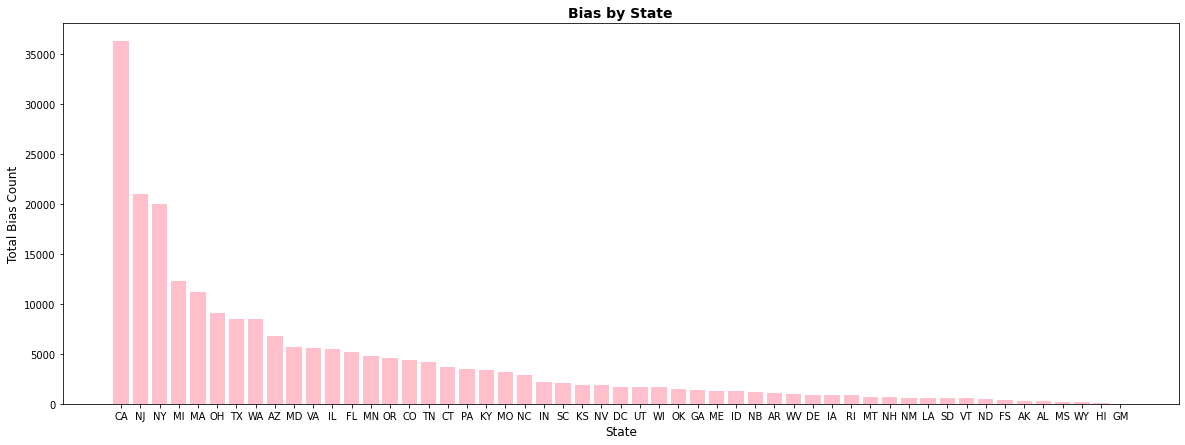

In [9]:
#visualize bias by state

state = state_bias_df['STATE_ABBR']
crime = state_bias_df['BIAS_DESC']

plt.figure(figsize=(20,7))

#plot the graph
bar_chart  = plt.bar(state, crime, color ='pink', align = 'center')
plt.title('Bias by State', fontsize = 14, fontweight = 'bold')
plt.xlabel('State', fontsize = 12)
plt.ylabel('Total Bias Count', fontsize = 12)

In [10]:
#add total victim count
state_offender_count = grouped_states['TOTAL_OFFENDER_COUNT'].sum().sort_values(ascending=False)

offender_df = pd.DataFrame(state_offender_count)
offender_df

,TOTAL_OFFENDER_COUNT
STATE_ABBR,
CA,39261
NY,12310
MI,11735
TX,10192
NJ,9813
MA,9539
OH,9127
WA,8324
IL,8063


In [11]:
offender_df1 = offender_df.reset_index()
offender_df1

,STATE_ABBR,TOTAL_OFFENDER_COUNT
0,CA,39261
1,NY,12310
2,MI,11735
3,TX,10192
4,NJ,9813
5,MA,9539
6,OH,9127
7,WA,8324
8,IL,8063
9,FL,6734


In [12]:
#add BIAS_DESC to the dataframe
#extract it from the bias_state_df, turn it into a list, than add it to the dataframe

biases = state_bias_df['BIAS_DESC']
bias_list = biases.to_list()

df2 = offender_df1.assign(Bias_Count=bias_list)
df2

,STATE_ABBR,TOTAL_OFFENDER_COUNT,Bias_Count
0,CA,39261,36235
1,NY,12310,20960
2,MI,11735,20006
3,TX,10192,12229
4,NJ,9813,11178
5,MA,9539,9051
6,OH,9127,8483
7,WA,8324,8472
8,IL,8063,6764
9,FL,6734,5682


## Include frequency of incidents by state

**Group incidents by state

**Total number of incidents per state**

**Total number offenders and victims**

**Aggregate incident count by state and groupby state**

In [13]:
combined_df['INCIDENT_COUNT'] = 1

state_sums = combined_df.groupby(['STATE_ABBR']).sum().reset_index()
hc_by_state = state_sums.drop(['CONGRESS', 'YEAR_START', 'YEAR_END', 'DATA_YEAR'], axis=1)
hc_by_state

,STATE_ABBR,TOTAL_OFFENDER_COUNT,VICTIM_COUNT,INCIDENT_COUNT
0,AK,360,305,237
1,AL,200,270,231
2,AR,1285,1355,1119
3,AZ,6448,9037,6764
4,CA,39261,46685,36235
5,CO,5117,5891,4341
6,CT,2947,4891,3658
7,DC,2206,1972,1710
8,DE,736,1207,927
9,FL,6734,6208,5185


**Add BIAS_COUNT so that it's in the same dataframe as INCIDENTS_COUNT and rename the columns in the dataframe using the rename method**

In [14]:
state_df = hc_by_state.assign(BIAS_COUNT=bias_list)

#rename the columns
state_df.rename(columns ={'STATE_ABBR': 'State',
                         'TOTAL_OFFENDER_COUNT': 'Offenders',
                         'VICTIM_COUNT': 'Victims',
                         'INCIDENT_COUNT': 'Incidents',
                         'BIAS_COUNT': 'Bias'}, inplace=True)
state_df.head()

,State,Offenders,Victims,Incidents,Bias
0,AK,360,305,237,36235
1,AL,200,270,231,20960
2,AR,1285,1355,1119,20006
3,AZ,6448,9037,6764,12229
4,CA,39261,46685,36235,11178


In [15]:
state_df.describe()

,Offenders,Victims,Incidents,Bias
count,53.000000,53.000000,53.000000,53.000000
mean,3959.528302,5168.622642,4142.962264,4142.962264
std,5963.920412,7717.634473,6331.994995,6331.994995
min,16.000000,11.000000,5.000000,5.000000
25%,703.000000,1050.000000,696.000000,696.000000
50%,2043.000000,2292.000000,1710.000000,1710.000000
75%,5103.000000,5957.000000,4738.000000,4738.000000
max,39261.000000,46685.000000,36235.000000,36235.000000


## KMeans Clustering: normalizing

**Will view states based the number of incidents and bias and check if there are any observable patterns by creating a scatter plot. The data will then be normalized using Normalizer before performing KMeans clustering.**

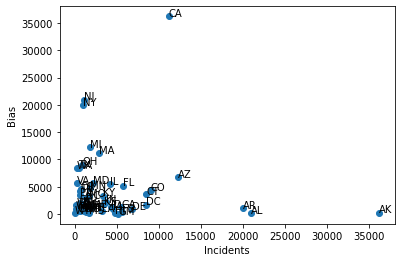

In [16]:
X = state_df.drop('State', axis=1)
y = state_df['State']


plt.scatter(X['Bias'], X['Incidents'])

#add labels
for i, txt in enumerate(y):
    plt.annotate(txt, (X['Bias'][i], X['Incidents'][i]))
    
plt.xlabel('Incidents')
plt.ylabel('Bias')
plt.show()

In [17]:
#instatiate normalizer
norm = Normalizer()

#fit normalizer to data
X_norm = norm.fit_transform(X)

In [19]:
#convert back to dataframe
norm_df  = pd.DataFrame(X_norm, columns = ["Offenders", "Victims", "Incidents", "Bias"])
norm_df.head()

,Offenders,Victims,Incidents,Bias
0,0.009934,0.008416,0.006540,0.999894
1,0.009540,0.012879,0.011019,0.999811
2,0.063854,0.067332,0.055605,0.994131
3,0.361277,0.506337,0.378982,0.685182
4,0.546620,0.649982,0.504490,0.155628


## Clustering

**The elbow method shows that 3 clusters is optimal.**
**Plot the inerias with the k-values**
**Inertia measures how spread out the clusters are (lower is better) and measures how far samples are from their centroids**

In [21]:
inertias = []

for k in range(1,10):
    #build and fit the model
    model = KMeans(n_clusters=k, random_state=24)
    model.fit(X_norm)
    inertia = model.inertia_
    inertias.append(inertia)
print(inertia)

0.2927329195551095


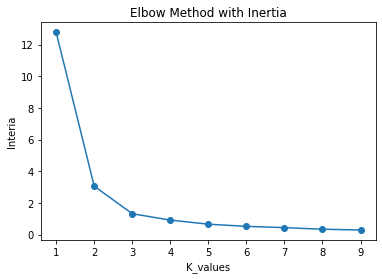

In [22]:
plt.plot(range(1,10), inertias,  '-o')
plt.xlabel('K_values')
plt.ylabel('Interia')
plt.title("Elbow Method with Inertia")
plt.show()

In [23]:
#create the kmeans model with 3 clusters
model = KMeans(n_clusters=3)

#fit the model
model.fit(X_norm)

#predict method on X_norm
labels = model.predict(X_norm)

print(labels)

[2 2 2 0 1 0 0 2 2 0 2 2 2 2 2 0 1 0 0 0 2 1 1 0 1 1 1 2 0 0 1 0 0 1 0 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1]


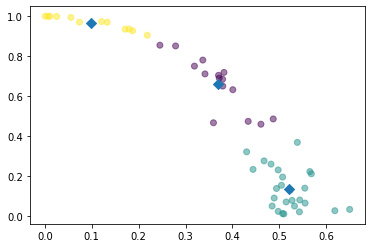

In [24]:
#assign the columns of X: xs and ys
xs = X_norm[:, 2]
ys = X_norm[:, 3]

# make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs,ys, c=labels, alpha = 0.5)

#cluster the centroids for the values
centroids = model.cluster_centers_

#get the centroids for the values
centroid_x = centroids[:,2]
centroid_y = centroids[:,3]

#make scatter plot
plt.scatter(centroid_x, centroid_y, marker='D', s=50)
plt.show()

## Agglomerative Clustering

In [25]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(X_norm)

array([0, 0, 0, 1, 2, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 0, 2,
       2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2])

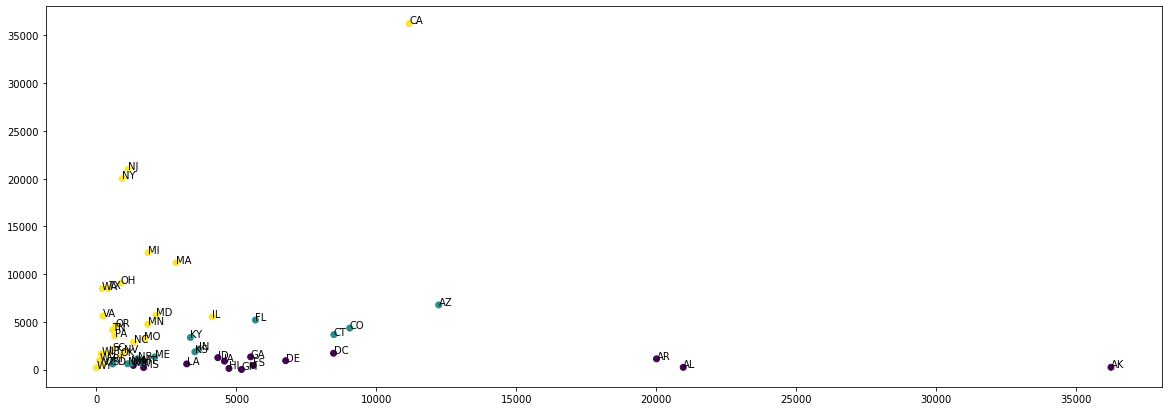

In [26]:
plt.figure(figsize=(20,7))
plt.scatter(X['Bias'], X['Incidents'], c = cluster.labels_)

#add labels
for i, txt in enumerate(y):
    plt.annotate(txt, (X['Bias'][i], X['Incidents'][i]))

## Hierarchical Clustering

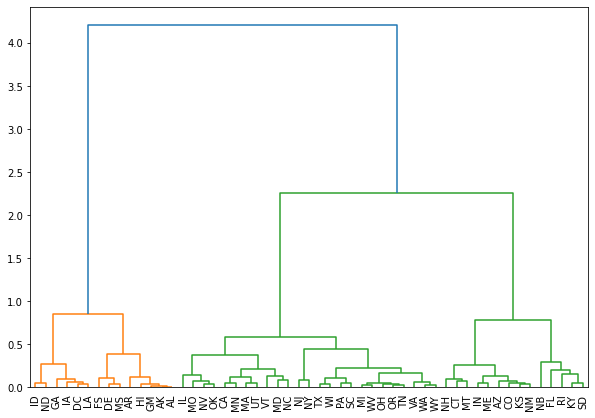

In [27]:
linked = linkage(X_norm, 'ward')
plt.figure(figsize=(10,7))
dendro = dendrogram(linked, labels=list(y), leaf_font_size=10)
plt.show()

# Checking if there are any patterns among states when we narrow the focus on Anti-Black bias since that is consistently the highest bias when exploring the data

**Reviewing Anti-black bias since it is consistently the highest bias reported with hate crimes. We will also see if there are any differences how the states clusters when we take a closer look at Anti-Black bias. 
The dataset with only Anti-Black bias has 75,266 rows and 21 columns.**

**The same steps were taken as above, but with a focus on Anti-Black bias**

In [30]:
Anti_Black_df = combined_df[combined_df["BIAS_DESC"] == 'Anti-Black or African American']
Anti_Black_df.head()

,DATA_YEAR,STATE_ABBR,REGION_NAME,POPULATION_GROUP_CODE,INCIDENT_DATE,TOTAL_OFFENDER_COUNT,OFFENDER_RACE,VICTIM_COUNT,OFFENSE_NAME,LOCATION_NAME,...,VICTIM_TYPES,CONGRESS,YEAR_START,YEAR_END,HOUSE_MAJORITY,SENATE_MAJORITY,PRESIDENCY,PRESIDENT,PARTY_GOVERNMENT,INCIDENT_COUNT
0,1991,AR,South,5,1991-08-31,1,White,1,Intimidation,Highway/Road/Alley/Street/Sidewalk,...,Individual,102,1991,1993,Democrats,Democrats,Republican,G.H.W Bush,Divided,1
2,1991,AR,South,3,1991-07-04,1,Black or African American,1,Aggravated Assault,Residence/Home,...,Individual,102,1991,1993,Democrats,Democrats,Republican,G.H.W Bush,Divided,1
11,1991,AR,South,8D,1991-10-14,1,White,1,Intimidation,School-College/University,...,Individual,102,1991,1993,Democrats,Democrats,Republican,G.H.W Bush,Divided,1
12,1991,AZ,West,1B,1991-01-15,0,Unknown,1,Intimidation,Residence/Home,...,Individual,102,1991,1993,Democrats,Democrats,Republican,G.H.W Bush,Divided,1
15,1991,AZ,West,1B,1991-02-04,1,White,1,Aggravated Assault,Highway/Road/Alley/Street/Sidewalk,...,Individual,102,1991,1993,Democrats,Democrats,Republican,G.H.W Bush,Divided,1


In [32]:
#groupby state and Anti-black bias description
grouped_states = Anti_Black_df.groupby(['STATE_ABBR'])
black_bias_states = grouped_states['BIAS_DESC'].count().sort_values(ascending=False)

#convert to dataframe
black_bias_states = pd.DataFrame(black_bias_states)

#reset index
black_bias_df = black_bias_states.reset_index()
black_bias_df.head()

,STATE_ABBR,BIAS_DESC
0,CA,11325
1,NJ,8099
2,MI,4693
3,NY,4450
4,MA,3501


Text(0, 0.5, 'Total Anti-Black Bias Count')

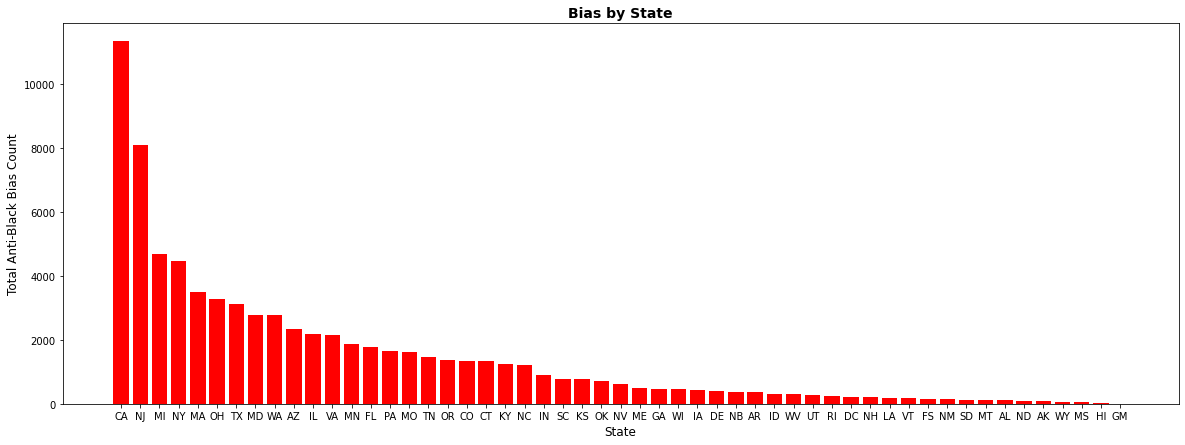

In [33]:
#visualize

states = black_bias_df['STATE_ABBR']
crimes = black_bias_df['BIAS_DESC']

plt.figure(figsize=(20,7))

#plot the graph
bar_chart  = plt.bar(states, crimes, color ='red', align = 'center')
plt.title('Bias by State', fontsize = 14, fontweight = 'bold')
plt.xlabel('State', fontsize = 12)
plt.ylabel('Total Anti-Black Bias Count', fontsize = 12)

In [35]:
Anti_Black_df['INCIDENT_COUNT'] = 1

stategrouped = Anti_Black_df.groupby(['STATE_ABBR']).sum().reset_index()
by_state = stategrouped.drop(['CONGRESS', 'YEAR_START', 'YEAR_END', 'DATA_YEAR'], axis=1)
by_state.head()

,STATE_ABBR,TOTAL_OFFENDER_COUNT,VICTIM_COUNT,INCIDENT_COUNT
0,AK,101,121,86
1,AL,85,128,108
2,AR,440,464,369
3,AZ,2321,3100,2337
4,CA,13253,14689,11325


In [36]:
bias = black_bias_df['BIAS_DESC']
bias_list2 = bias.to_list()

black_bias = by_state.assign(BIAS_COUNT=bias_list2)

#rename columns
black_bias.rename(columns ={'STATE_ABBR': 'State',
                         'TOTAL_OFFENDER_COUNT': 'Offenders',
                         'VICTIM_COUNT': 'Victims',
                         'INCIDENT_COUNT': 'Incidents',
                         'BIAS_COUNT': 'Bias'}, inplace=True)
black_bias.head()

,State,Offenders,Victims,Incidents,Bias
0,AK,101,121,86,11325
1,AL,85,128,108,8099
2,AR,440,464,369,4693
3,AZ,2321,3100,2337,4450
4,CA,13253,14689,11325,3501


In [37]:
black_bias.describe()

,Offenders,Victims,Incidents,Bias
count,53.000000,53.000000,53.000000,53.000000
mean,1353.981132,1797.320755,1420.113208,1420.113208
std,2036.906955,2519.286856,2052.733465,2052.733465
min,6.000000,1.000000,1.000000,1.000000
25%,177.000000,297.000000,210.000000,210.000000
50%,648.000000,807.000000,610.000000,610.000000
75%,1899.000000,2318.000000,1788.000000,1788.000000
max,13253.000000,14689.000000,11325.000000,11325.000000


## Normalize and KMeans

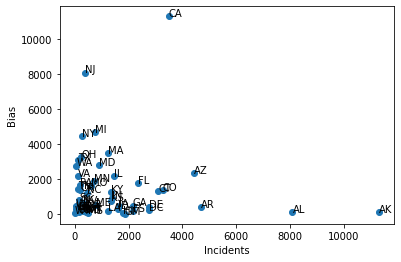

In [38]:
X1 = black_bias.drop('State', axis=1)
y1 = black_bias['State']

#create scatter plot
plt.scatter(X1['Bias'], X1['Incidents'])
#add labels
for i, txt in enumerate(y):
    plt.annotate(txt, (X1['Bias'][i], X1['Incidents'][i]))
    
plt.xlabel('Incidents')
plt.ylabel('Bias')
plt.show()

In [40]:
#instatiate normalizer
norm = Normalizer()

#fit normalizer to data
X1_norm = norm.fit_transform(X1)

#convert back to dataframe
norm_df1  = pd.DataFrame(X1_norm, columns = ["Offenders", "Victims", "Incidents", "Bias"])
norm_df1.head()

,Offenders,Victims,Incidents,Bias
0,0.008917,0.010683,0.007593,0.999874
1,0.010492,0.015800,0.013331,0.999731
2,0.092618,0.097669,0.077672,0.987851
3,0.365790,0.488561,0.368312,0.701321
4,0.574633,0.636896,0.491037,0.151799


## Clustering for Anti-Black bias

In [41]:
inertias = []

for k in range(1,10):
    #build and fit the model
    model = KMeans(n_clusters=k, random_state=24)
    model.fit(X1_norm)
    inertia = model.inertia_
    inertias.append(inertia)
    
print(inertia)

0.2529931220196878


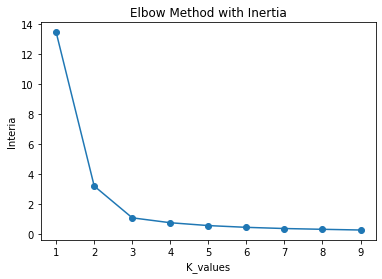

In [42]:
#plot the inerias with the k-values
#inertia measures how spread out the clusters are (lower is better)
#measures how far samples are from their centroids

plt.plot(range(1,10), inertias,  '-o')
plt.xlabel('K_values')
plt.ylabel('Interia')
plt.title("Elbow Method with Inertia")
plt.show()

In [43]:
#create the kmeans model with 3 clusters
model = KMeans(n_clusters=3)

#fit the model
model.fit(X1_norm)

#predict method on X_norm
labels1 = model.predict(X1_norm)
print(labels1)

[1 1 1 0 2 0 0 1 1 0 1 1 1 1 1 1 2 0 0 0 1 2 2 0 2 2 2 1 1 0 2 1 0 2 0 2 2
 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2]


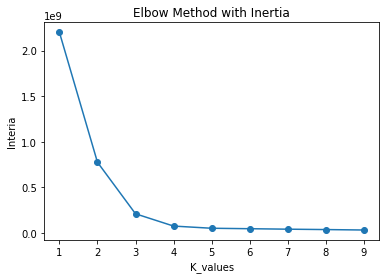

In [57]:
#plot interia with the k values
plt.plot(range(1,10), inertias, '-o')
plt.xlabel('K_values')
plt.ylabel('Interia')
plt.title("Elbow Method with Inertia")
plt.show()

#optimal number of clustering is 3

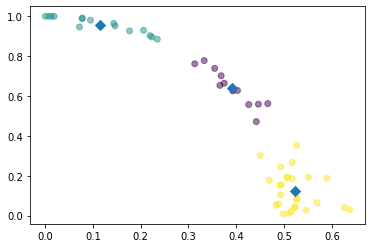

In [44]:
#assign the columns of X: xs and ys
xs1 = X1_norm[:, 2]
ys1 = X1_norm[:, 3]

# make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs1,ys1, c=labels1, alpha = 0.5)

#cluster the centroids for the values
centroids = model.cluster_centers_

#get the centroids for the values
centroid_x1 = centroids[:,2]
centroid_y1 = centroids[:,3]

#make scatter plot
plt.scatter(centroid_x1, centroid_y1, marker='D', s=50)
plt.show()

## Agglomerative Clustering for Anti-Black bias

In [45]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(X1_norm)

array([0, 0, 0, 1, 2, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 0, 2,
       2, 1, 2, 2, 2, 0, 0, 1, 2, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2])

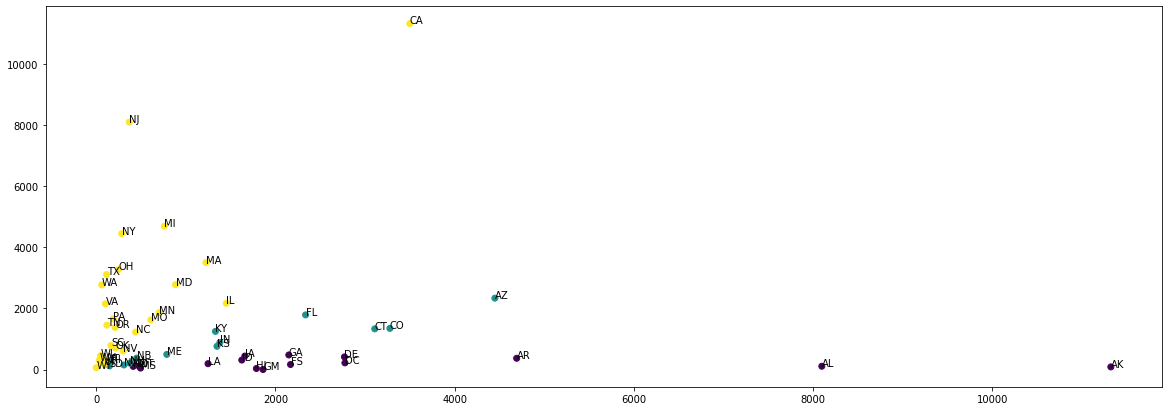

In [46]:
plt.figure(figsize=(20,7))
plt.scatter(X1['Bias'], X1['Incidents'], c = cluster.labels_)

#add labels
for i, txt in enumerate(y1):
    plt.annotate(txt, (X1['Bias'][i], X1['Incidents'][i]))

## Hierarchical Clustering

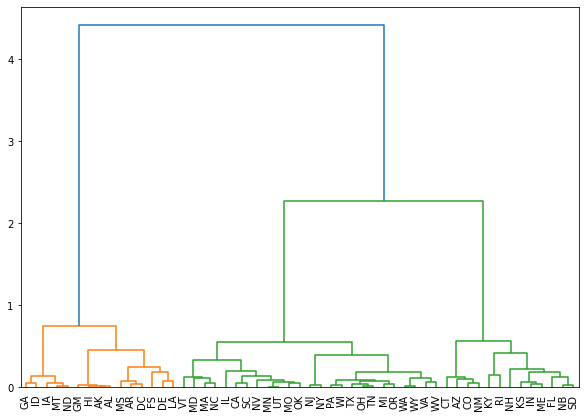

In [47]:
linked = linkage(X1_norm, 'ward')
plt.figure(figsize=(10,7))
plt.xticks(fontsize=16)
dendro = dendrogram(linked, labels=list(y1), leaf_font_size=10)
plt.show()

**States do tend to form into different clusters when viewing them by all biases versuses Anti-Black bias. 3 clusters does remain consistent for both types of clusters.**